### **Breast Cancer Classification using Machine Learning**
#### **Diagnostic Wisconsin Breast Cancer Dataset (WDBC)**  

#### ** Project Overview**  
Breast cancer is one of the most prevalent diseases affecting women worldwide. Early diagnosis is crucial for effective treatment, and machine learning can help improve diagnostic accuracy.  

This project utilizes the **Diagnostic Wisconsin Breast Cancer Dataset (WDBC)** to build a classification model that predicts whether a breast tumor is **malignant** or **benign** based on **30 computed features** extracted from digitized images of fine needle aspirate (FNA) biopsies.  

Data source: <https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data?select=data.csv>

#### ** Dataset Information**  
- **Source**: UCI Machine Learning Repository  
- **# Instances**: 569  
- **# Features**: 30 (Real-valued)  
- **Target Variable**:  
  - `M` (Malignant - Cancerous)  
  - `B` (Benign - Non-Cancerous)  

#### ** Project Goals**  
1. **Exploratory Data Analysis (EDA)**  
   - Understand feature distributions and relationships  
   - Identify missing values and correlations  
   - Visualize data using histograms, scatter plots, and heatmaps  
2. **Preprocessing & Feature Engineering**  
   - Handle missing values  
   - Standardize numerical features  
   - Split data into training & test sets  
3. **Model Building & Evaluation**  
   - Train multiple classifiers: **Logistic Regression, Random Forest, SVM, and XGBoost**  
   - Use **cross-validation** for robustness  
   - Evaluate performance using **precision, recall, F1-score, and ROC-AUC**  
4. **Feature Importance & Interpretability**  
   - Identify key features contributing to predictions  
   - Visualize decision boundaries  

#### ** Technologies Used**
- **Programming Language**: Python  
- **Libraries**: Pandas, NumPy, Matplotlib, Seaborn, Scikit-Learn, XGBoost  

#### ** Results & Conclusion**
This project aims to showcase the power of machine learning in medical diagnostics. By leveraging different classification algorithms, we aim to develop an **accurate and interpretable model** demonstrate the power of machine learning in breast cancer diagnosis

In [84]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [86]:
df.shape

(569, 33)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [88]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [89]:
# Check if all values in 'Unnamed: 32' are NaN
df["Unnamed: 32"].isna().all()

True

In [90]:
# Drop unnamed column
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

# Verify removal
print(df.columns)
print(df.shape)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
(569, 32)


In [91]:
# Summary statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


diagnosis
B    357
M    212
Name: count, dtype: int64


C:\Users\ROnik\AppData\Local\Temp\ipykernel_15984\134466872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["diagnosis"], palette=["#FF9999", "#66B3FF"])


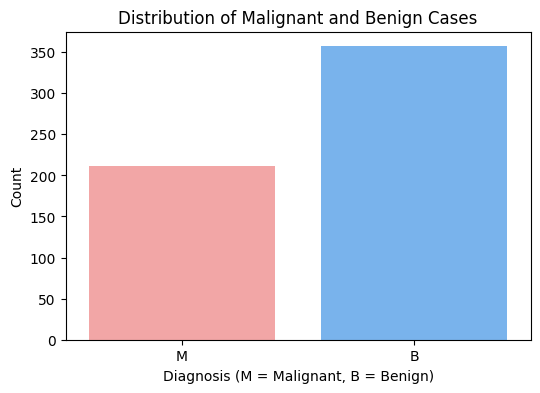

In [92]:
# Count of Benign (B) and Malignant (M) cases
print(df["diagnosis"].value_counts())

# Plot distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["diagnosis"], palette=["#FF9999", "#66B3FF"])
plt.title("Distribution of Malignant and Benign Cases")
plt.xlabel("Diagnosis (M = Malignant, B = Benign)")
plt.ylabel("Count")
plt.show()

In [93]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

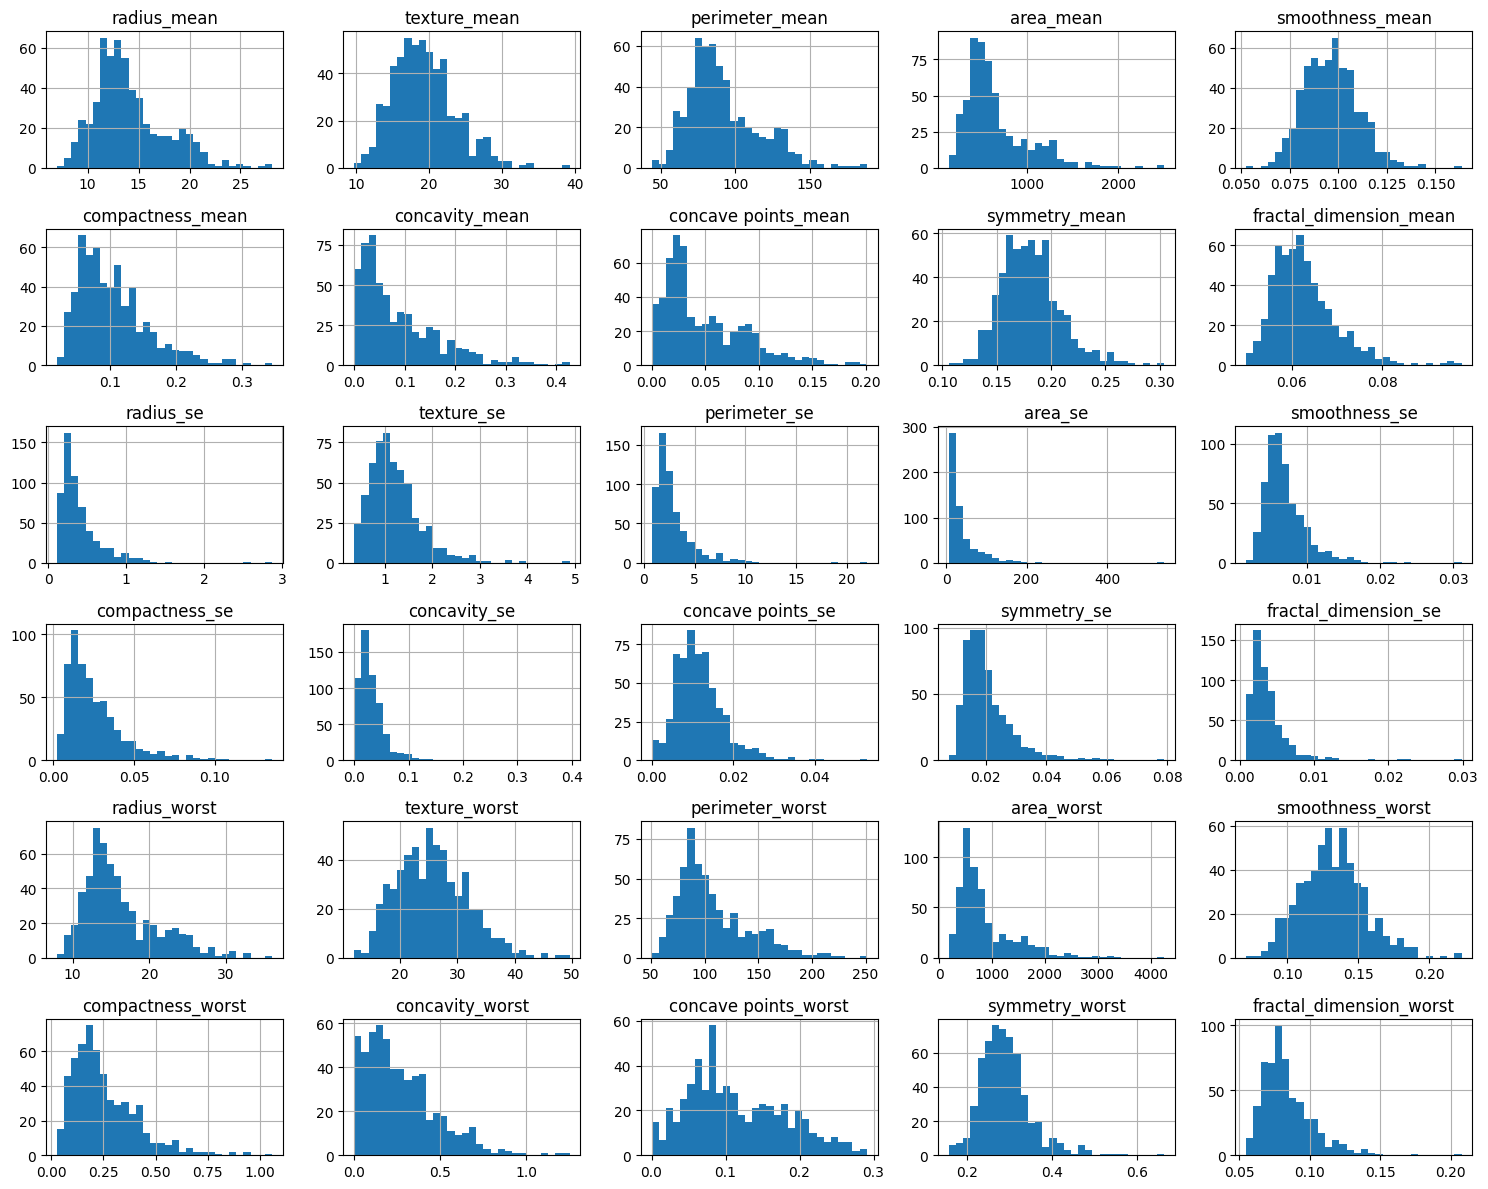

In [94]:
# Histogram of the features
df.iloc[:, 2:].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

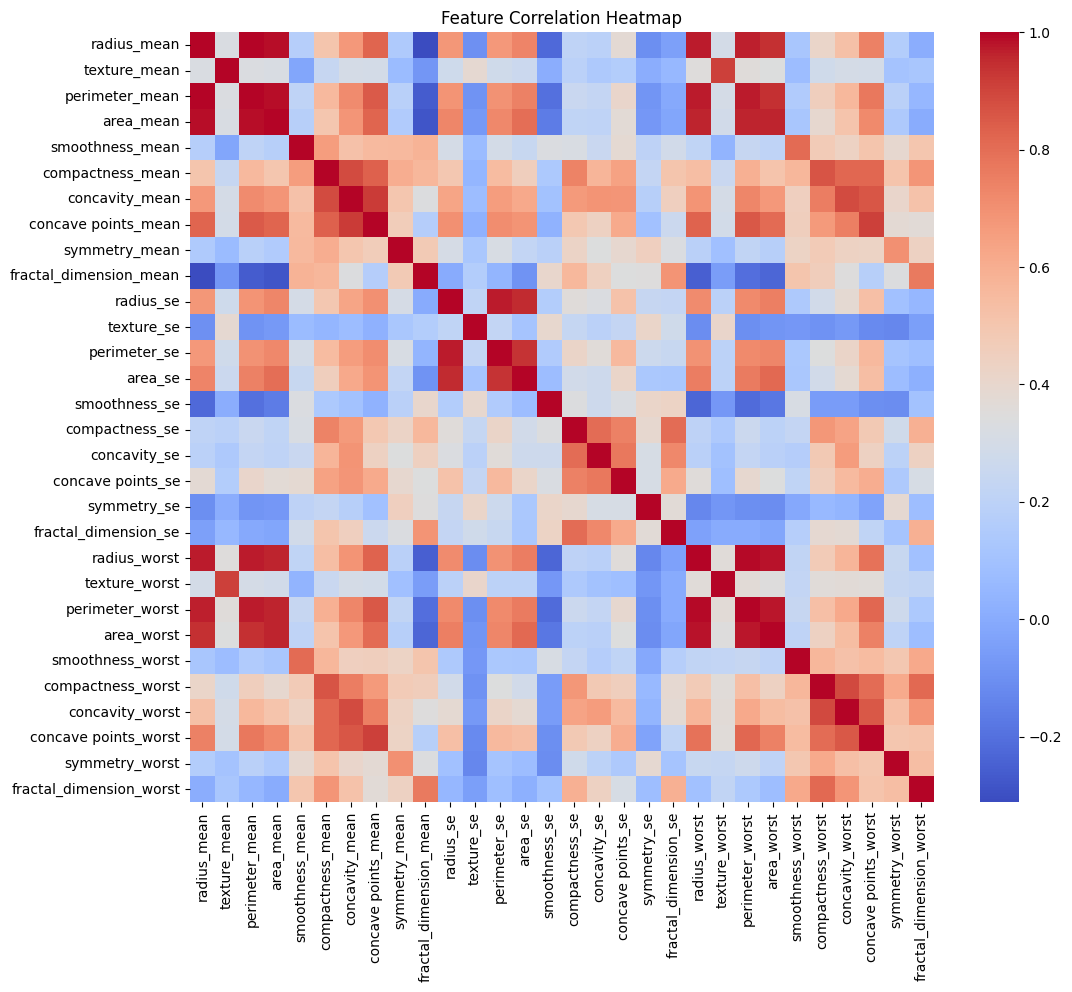

In [95]:
# Compute correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.iloc[:, 2:].corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## Exploratory Data Analysis (EDA) - Breast Cancer Dataset

### **Key Findings**
1. **No Missing Values:** The dataset is clean, with no NaN (missing) values.
2. **Feature Distributions:**
   - Many features, such as `radius_mean`, `perimeter_mean`, and `area_mean`, appear **right-skewed**.
   - Features like `smoothness_mean` and `symmetry_mean` have **a more symmetric distribution**.
3. **Class Balance:**
   - The dataset contains **more benign cases than malignant cases**.
   - The dataset contains more benign cases (357) than malignant cases (212)
   - The ratio is approximately 1.68:1 (benign:malignant)
   - This moderate imbalance will be addressed through:
     - Stratified sampling in train-test splits
     - Use of metrics sensitive to class imbalance (precision, recall, F1)
     - ROC-AUC score for balanced evaluation
   - Note: Additional balancing techniques (SMOTE, class weights) were considered but deemed unnecessary given the moderate nature of the imbalance4. 
4. **Correlation Analysis:**
   - High correlation among some features, e.g., `radius_mean`, `perimeter_mean`, and `area_mean`.
   - This suggests potential **multicollinearity**, which could impact some models.

In [96]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Convert 'Diagnosis' to binary (M → 1, B → 0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# First, store the feature names before any dropping
feature_names = df.columns.tolist()
feature_names.remove('id')  # Remove id from our feature list
feature_names.remove('diagnosis')  # Remove diagnosis since it's our target


# Drop the ID column
df = df.drop(columns=["id"])

# Separate features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Confirm shapes
print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

# Cross-validation setup (5-fold stratified)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Training Set Shape: (455, 30)
Test Set Shape: (114, 30)


## Model Training & Evaluation

### Objective:
Now that our dataset is cleaned and preprocessed, we will train multiple machine learning models to classify breast cancer tumors as **Benign (B)** or **Malignant (M)**.

### Models Used:
We will evaluate the following models:
1. Logistic Regression - A simple linear model that serves as our baseline classifier. Its linear nature makes it particularly interpretable, as we can directly examine how each feature contributes to the classification decision.

2. Random Forest - An ensemble learning method using multiple decision trees that offers:
   - Natural handling of both large and small feature values through tree-based splitting
   - Built-in feature importance measures to understand which tumor characteristics matter most
   - Good protection against overfitting through averaging multiple trees
   
3. Support Vector Machine (SVM) - A classifier that excels at finding clear separation boundaries between classes. Particularly useful for our dataset because:
   - Works well with standardized numerical features
   - Can capture both linear and non-linear relationships in the data
   - Often performs well in medical classification tasks

4. XGBoost - A gradient boosting model chosen for:
   - Strong performance with numerical features like our tumor measurements
   - Ability to capture subtle patterns in medical diagnostic data
   - Widely used in medical classification tasks with strong empirical results

### Evaluation Metrics:
Each model will be evaluated based on:
- **Accuracy**: Overall correctness of predictions.
- **Precision**: How many predicted malignant cases were actually malignant?
- **Recall (Sensitivity)**: How many actual malignant cases were correctly identified?
- **F1 Score**: Balance between precision and recall.
- **ROC AUC Score**: Measures model ability to distinguish between classes.

### Steps:
1. **Train all models on the training set (`X_train`, `y_train`)**.
2. **Make predictions on the test set (`X_test`, `y_test`)**.
3. **Compare model performance across all metrics**.
4. **Plot a Confusion Matrix for the best model**.

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.964912      0.975  0.928571  0.951220  0.996032
Random Forest        0.973684      1.000  0.928571  0.962963  0.992890
SVM                  0.973684      1.000  0.928571  0.962963  0.995370
XGBoost              0.956140      1.000  0.880952  0.936709  0.993386


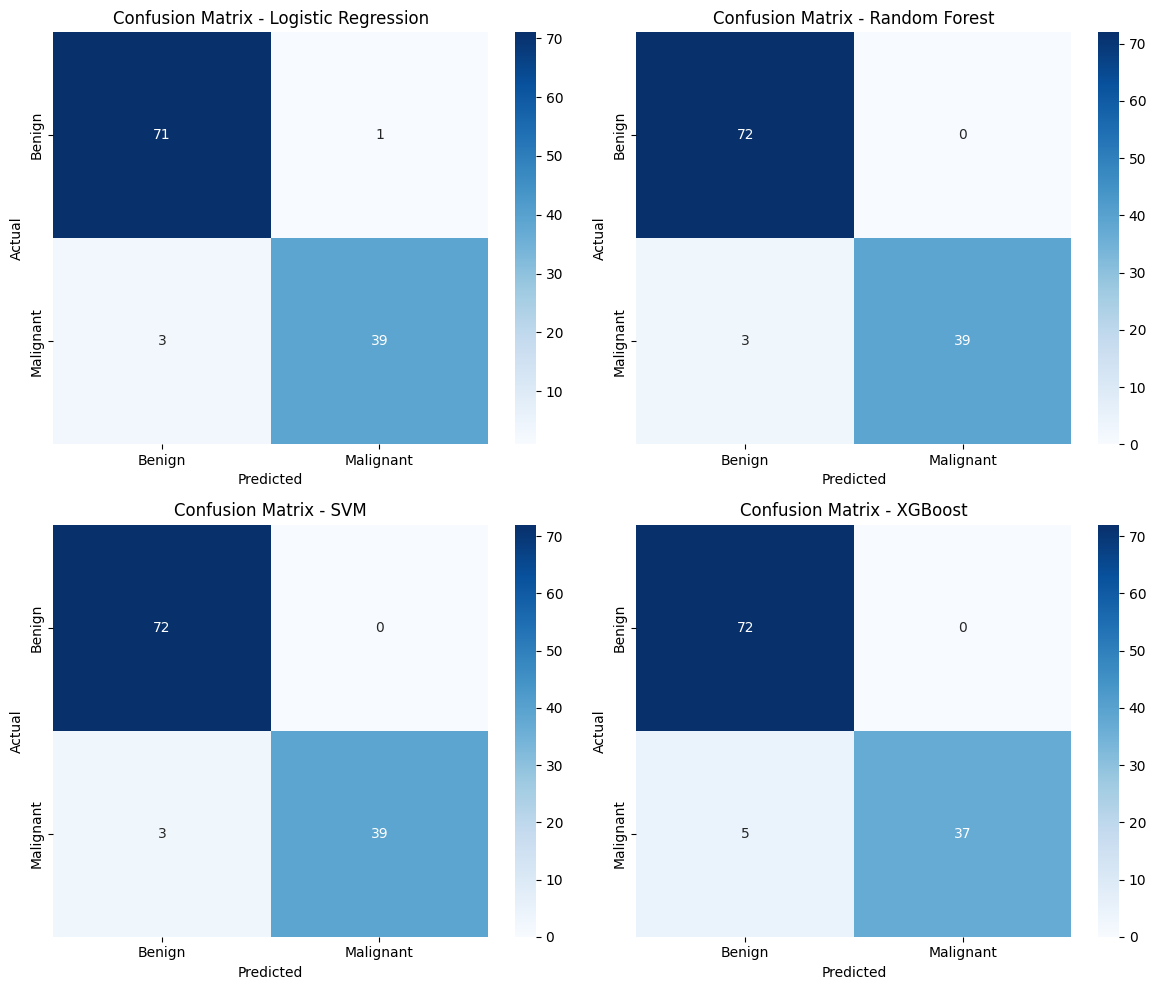


Logistic Regression:
False Negatives (Missed Cancers): 3
False Positives (Unnecessary Concerns): 1

Random Forest:
False Negatives (Missed Cancers): 3
False Positives (Unnecessary Concerns): 0

SVM:
False Negatives (Missed Cancers): 3
False Positives (Unnecessary Concerns): 0

XGBoost:
False Negatives (Missed Cancers): 5
False Positives (Unnecessary Concerns): 0


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42) #measures how far predicted probabilities are from actual values
}

# Store results
results = {}

# Train & Evaluate Models
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For ROC-AUC

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = [accuracy, precision, recall, f1, roc_auc]

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]).T

# Display results
print(results_df)

# Plot Confusion Matrices for All Models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Benign", "Malignant"], 
                yticklabels=["Benign", "Malignant"], 
                ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Add interpretation
for name, model in models.items():
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    
    print(f"\n{name}:")
    print(f"False Negatives (Missed Cancers): {fn}")
    print(f"False Positives (Unnecessary Concerns): {fp}")

## Model Evaluation & Results

### Performance Metrics Summary
| Model               | Accuracy | Precision | Recall  | F1 Score | ROC AUC |
|---------------------|----------|-----------|---------|----------|---------|
| Logistic Regression | 0.9649   | 0.975     | 0.9286  | 0.9512   | 0.9960  |
| Random Forest       | 0.9737   | 1.000     | 0.9286  | 0.9629   | 0.9929  |
| SVM                 | 0.9737   | 1.000     | 0.9286  | 0.9629   | 0.9954  |
| XGBoost             | 0.9561   | 1.000     | 0.8810  | 0.9367   | 0.9934  |

### Critical Error Analysis
Examining the models' errors in a medical context:

1. **False Negatives (Missed Cancers)**
   - Logistic Regression, Random Forest, and SVM: 3 missed cancers
   - XGBoost: 5 missed cancers
   - This is the most critical error type in cancer diagnosis

2. **False Positives (Unnecessary Concerns)**
   - Logistic Regression: 1 case
   - Random Forest, SVM, XGBoost: 0 cases
   - While less critical than missed cancers, these can lead to unnecessary stress and procedures

### Model Comparison Insights
1. **Best Overall Performance**
   - Random Forest and SVM achieved identical performance metrics
   - Perfect precision (1.000) with minimal false positives
   - Consistent false negative rate (3 cases) with other models except XGBoost

2. **Trade-offs**
   - Logistic Regression: Slightly more false positives but strong overall performance (highest ROC AUC)
   - XGBoost: Higher false negative rate but no false positives
   - Random Forest/SVM: Best balance of minimizing both error types

### Clinical Implications
- All models maintain high accuracy (>95%)
- The consistent pattern of 3 false negatives across most models suggests these may be particularly challenging cases
- The trade-off between false positives and negatives is minimal, with most models achieving excellent balance

## Next Steps & Considerations

### 1. Model Understanding
- Analyze feature importance to understand which tumor characteristics drive predictions
- Investigate misclassified cases to understand model limitations
- Study the relationship between feature correlations and model decisions

### 2. Model Improvement Opportunities
- Explore hyperparameter tuning to optimize model performance
- Consider threshold adjustments to balance sensitivity and specificity
- Investigate ensemble methods combining our top-performing models

Top 10 Most Important Features - Random Forest:
                 feature  importance
23            area_worst    0.151412
27  concave points_worst    0.126497
20          radius_worst    0.093475
22       perimeter_worst    0.083642
7    concave points_mean    0.081082
2         perimeter_mean    0.077126
0            radius_mean    0.061990
6         concavity_mean    0.050818
3              area_mean    0.045916
26       concavity_worst    0.030022

Top 10 Most Important Features - Logistic Regression:
                feature  importance
21        texture_worst    1.442609
10            radius_se    1.207811
28       symmetry_worst    1.060806
7   concave points_mean    0.945871
13              area_se    0.914838
26      concavity_worst    0.908802
15       compactness_se    0.906313
23           area_worst    0.894827
20         radius_worst    0.879742
6        concavity_mean    0.778171


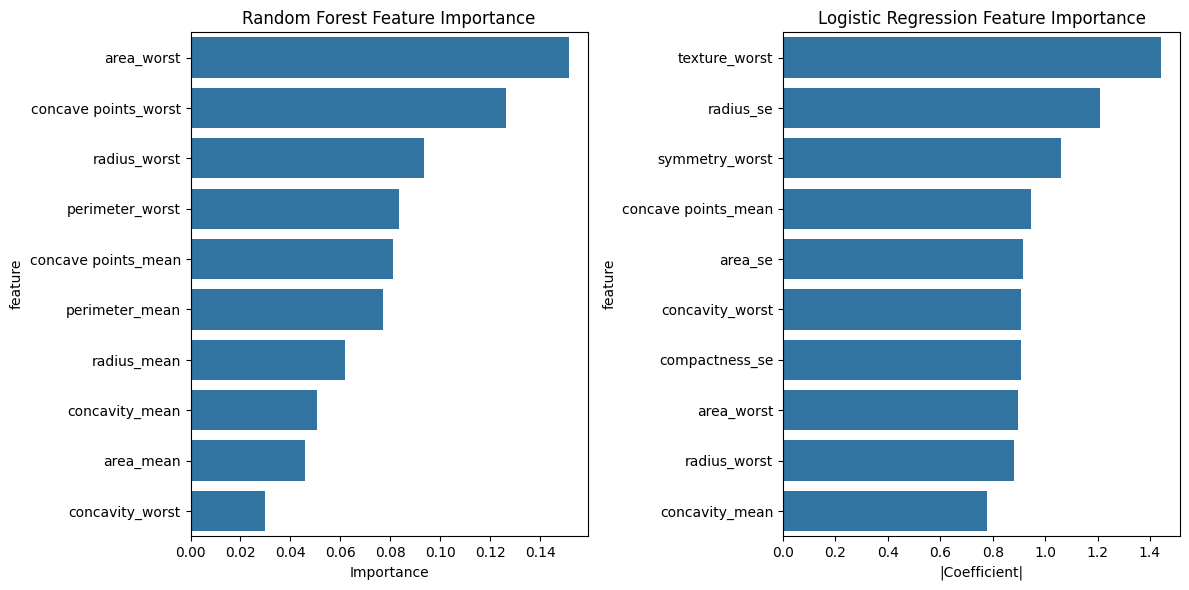


Features with Largest Ranking Differences Between Models:
           feature  rf_rank  lr_rank  rank_diff
5   perimeter_mean        5       23         18
21  compactness_se       21        6         15
15       radius_se       15        1         14
6      radius_mean        6       20         14
16  symmetry_worst       16        2         14


In [98]:
# Random Forest Feature Importance
rf_model = models["Random Forest"]
rf_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
})
rf_importance = rf_importance.sort_values('importance', ascending=False)

# Logistic Regression Coefficients (absolute values for importance)
lr_model = models["Logistic Regression"]
lr_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(lr_model.coef_[0])  # absolute values
})
lr_importance = lr_importance.sort_values('importance', ascending=False)

# Display top 10 features for each model
print("Top 10 Most Important Features - Random Forest:")
print(rf_importance.head(10))
print("\nTop 10 Most Important Features - Logistic Regression:")
print(lr_importance.head(10))

# Visualize feature importance for both models
plt.figure(figsize=(12, 6))

# Random Forest
plt.subplot(1, 2, 1)
sns.barplot(data=rf_importance.head(10), x='importance', y='feature')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()

# Logistic Regression
plt.subplot(1, 2, 2)
sns.barplot(data=lr_importance.head(10), x='importance', y='feature')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('|Coefficient|')
plt.tight_layout()

plt.show()

# Compare rankings between models
rf_importance['rf_rank'] = range(len(rf_importance))
lr_importance['lr_rank'] = range(len(lr_importance))

# Merge rankings
ranking_comparison = pd.merge(
    rf_importance[['feature', 'rf_rank']], 
    lr_importance[['feature', 'lr_rank']], 
    on='feature'
)
ranking_comparison['rank_diff'] = abs(ranking_comparison['rf_rank'] - ranking_comparison['lr_rank'])
ranking_comparison = ranking_comparison.sort_values('rank_diff', ascending=False)

print("\nFeatures with Largest Ranking Differences Between Models:")
print(ranking_comparison.head())

### Feature Importance Analysis

Analyzing feature importance across our models reveals interesting patterns about which tumor characteristics are most predictive:

#### Random Forest Importance
- The three most important features are 'area_worst', 'concave points_worst', and 'radius_worst', suggesting that extreme measurements are particularly informative
- The model heavily weights "worst" features (maximum values) over mean or SE measurements
- Geometric features (area, radius, perimeter) and shape characteristics (concave points) are both important

#### Logistic Regression Importance
- Texture and radius measurements (particularly 'texture_worst' and 'radius_se') are the strongest predictors
- The model gives high importance to standard error measurements (SE), unlike Random Forest
- Shape asymmetry ('symmetry_worst') plays a more significant role compared to Random Forest

#### Model Comparison
- The models show notable differences in how they weigh features:
  - Perimeter_mean has an 18-rank difference between models
  - Compactness_se and radius_se are ranked much higher by Logistic Regression
  - These differences help explain why using multiple models can be beneficial
  
Note: We focused on Random Forest and Logistic Regression for feature importance because:
1. Random Forest provides a robust, built-in importance measure based on how features improve prediction
2. Logistic Regression coefficients offer clear linear relationships between features and predictions
3. SVM's feature importance is less interpretable due to kernel transformations
4. While XGBoost has feature importance, it's similar to Random Forest as both are tree-based methods

## Threshold Optimization

In medical diagnostics, particularly cancer detection, the cost of different types of errors varies significantly:
- False Negatives (missing a cancer diagnosis) can be life-threatening
- False Positives (incorrectly diagnosing cancer) can lead to unnecessary stress and procedures

While our models show high overall accuracy, we should examine if adjusting the classification threshold from the default 0.5 could better serve the medical context. By analyzing ROC curves and precision-recall relationships, we can:
1. Visualize the trade-off between sensitivity and specificity
2. Find optimal thresholds that minimize critical errors
3. Compare how different threshold choices affect our predictions

This analysis focuses on our top-performing models: Random Forest and SVM, which achieved the highest accuracy (97.37%).

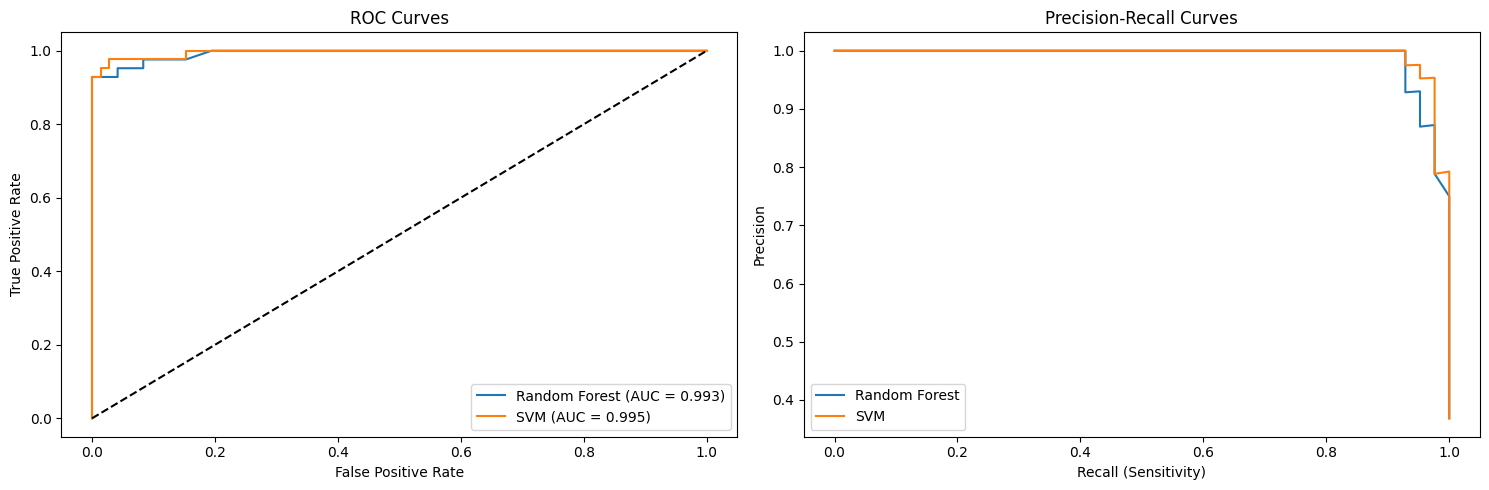


Results for Random Forest:
Threshold | False Negatives | False Positives
---------------------------------------------
0.300    |              3 |              3
0.400    |              3 |              1
0.500    |              3 |              0
0.510    |              3 |              0
0.600    |              5 |              0
0.700    |              7 |              0

Results for SVM:
Threshold | False Negatives | False Positives
---------------------------------------------
0.300    |              1 |              2
0.400    |              1 |              2
0.500    |              2 |              1
0.428    |              1 |              2
0.600    |              4 |              0
0.700    |              5 |              0


In [99]:
from sklearn.metrics import roc_curve, precision_recall_curve
import numpy as np

# We'll focus on our top models: Random Forest and SVM
plt.figure(figsize=(15, 5))

# Plot ROC curves
plt.subplot(1, 2, 1)
for name, model in models.items():
    if name in ['Random Forest', 'SVM']:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# Plot Precision-Recall curves
plt.subplot(1, 2, 2)
for name, model in models.items():
    if name in ['Random Forest', 'SVM']:
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        plt.plot(recall, precision, label=name)

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.tight_layout()
plt.show()

# Find optimal threshold based on different criteria
def find_optimal_threshold(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    # Youden's J statistic (maximizing sensitivity + specificity - 1)
    J = tpr - fpr
    optimal_idx = np.argmax(J)
    optimal_threshold = thresholds[optimal_idx]
    
    return optimal_threshold, fpr[optimal_idx], tpr[optimal_idx]

# Calculate and compare different thresholds
for name, model in models.items():
    if name in ['Random Forest', 'SVM']:
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Find optimal threshold
        optimal_threshold, fpr, tpr = find_optimal_threshold(y_test, y_prob)
        
        # Compare results with different thresholds
        thresholds_to_try = [0.3, 0.4, 0.5, optimal_threshold, 0.6, 0.7]
        
        print(f"\nResults for {name}:")
        print("Threshold | False Negatives | False Positives")
        print("-" * 45)
        
        for threshold in thresholds_to_try:
            y_pred = (y_prob >= threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            print(f"{threshold:.3f}    | {fn:14d} | {fp:14d}")



### Threshold Optimization Results

#### ROC and Precision-Recall Analysis
Both Random Forest and SVM show excellent performance with very high AUC scores (0.993 and 0.995 respectively). The Precision-Recall curves demonstrate that both models maintain high precision even at high recall values, only dropping significantly at very high recall (>0.9).

#### Threshold Analysis Results

**Random Forest:**
- Default threshold (0.5) yields 3 false negatives and 0 false positives
- Lowering the threshold to 0.4 maintains the same number of false negatives while only adding 1 false positive
- Increasing the threshold (0.6-0.7) increases false negatives without improving false positives
- Optimal threshold appears to be between 0.4-0.5

**SVM:**
- Shows slightly different behavior with its optimal threshold at 0.428
- At this optimal point: 1 false negative and 2 false positives
- More stable performance across different thresholds compared to Random Forest
- Maintains lower false negatives at lower thresholds

#### Recommendations
Given the critical nature of cancer diagnosis:
1. SVM with a threshold of 0.428 might be preferable as it minimizes false negatives (missed cancers)
2. If false positives are a major concern, Random Forest with default threshold (0.5) provides zero false positives while maintaining reasonable false negatives
3. The choice between models depends on the relative cost of false negatives versus false positives in the specific clinical context

Next steps could involve:
- Hyperparameter tuning to see if we can further improve the base model performance
- Cross-validation of these threshold effects to ensure their stability

## Hyperparameter Tuning

After optimizing our classification thresholds, we'll now tune our Random Forest model's hyperparameters to potentially improve its base performance. We'll focus on key parameters that typically have the most impact:

- n_estimators: number of trees in the forest
- max_depth: maximum depth of each tree
- min_samples_split: minimum samples required to split a node
- min_samples_leaf: minimum samples required at each leaf node

We'll use GridSearchCV with stratified 5-fold cross-validation to systematically explore these parameters while preventing overfitting.

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validation score: 0.9906088751289989

Test Set Comparison:
Metric          Original RF  Tuned RF
----------------------------------------
Accuracy:       0.9737     0.9737
ROC AUC:        0.9929     0.9947

Confusion Matrix for Tuned Model:


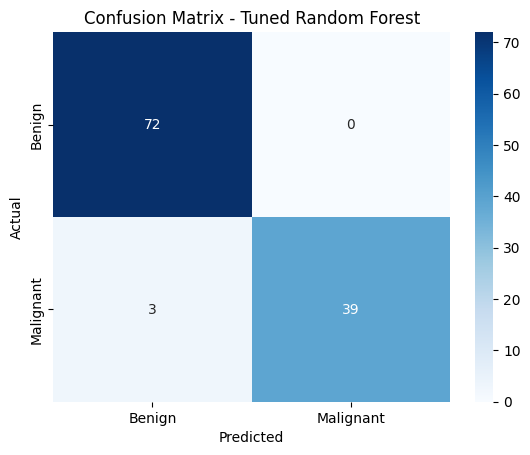

In [100]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',  # Using ROC AUC as our metric
    n_jobs=-1,  # Use all available cores
    verbose=2   # Show progress
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

# Compare with original model
print("\nTest Set Comparison:")
print("Metric          Original RF  Tuned RF")
print("-" * 40)
print(f"Accuracy:       {accuracy_score(y_test, models['Random Forest'].predict(X_test)):.4f}     {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC:        {roc_auc_score(y_test, models['Random Forest'].predict_proba(X_test)[:, 1]):.4f}     {roc_auc_score(y_test, y_prob):.4f}")

# Confusion matrix for tuned model
print("\nConfusion Matrix for Tuned Model:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Hyperparameter Tuning Results

#### Optimal Parameters Found
- max_depth: 10
- min_samples_leaf: 1
- min_samples_split: 5
- n_estimators: 300

#### Performance Comparison
The tuned Random Forest model shows:
- Identical accuracy (97.37%) to the original model
- Slight improvement in ROC AUC from 0.9929 to 0.9947
- Same confusion matrix pattern with 3 false negatives and 0 false positives

#### Analysis
1. **Limited Improvement**: The minimal performance gain suggests our original model was already well-configured for this dataset. This is common in well-behaved, moderate-sized datasets where default parameters often perform well.

2. **Model Stability**: The consistent confusion matrix pattern (identical error counts) between original and tuned models suggests:
   - Robust performance across different configurations
   - The remaining misclassifications might represent inherently challenging cases

3. **Computational Trade-off**: While we achieved a marginal improvement in ROC AUC, the increased complexity (300 trees vs default 100) might not justify the minimal gain in performance.

#### Conclusion
The hyperparameter tuning exercise, while not yielding substantial improvements, validates our original model's strong performance and provides confidence in its robustness. The consistency in results across different configurations suggests we've reached near-optimal performance for this dataset using Random Forest.

## Conclusions and Future Recommendations

### Project Summary
This analysis of the Wisconsin Breast Cancer Diagnostic dataset demonstrated:
1. Excellent performance across multiple classification models (>95% accuracy)
2. Successful optimization through threshold tuning and hyperparameter adjustment
3. Robust feature importance analysis providing insights into key diagnostic indicators

### Key Findings

**Model Performance**
- SVM and Random Forest achieved the highest accuracy (97.37%)
- Logistic Regression provided strong baseline performance (96.49%)
- All models maintained high precision and recall, crucial for medical applications

**Feature Analysis**
- Extreme measurements ("worst" features) were particularly predictive
- Geometric features (area, radius) and shape characteristics (concave points) showed high importance
- Different models weighted features differently, suggesting value in ensemble approaches

**Optimization Results**
- Threshold optimization revealed potential to minimize false negatives
- Hyperparameter tuning validated the robustness of our initial model settings
- Trade-offs between false positives and negatives were clearly quantified

### Limitations and Considerations
1. Dataset Size
  - Moderate sample size (569 cases)
  - Results would benefit from validation on larger, more diverse datasets

2. Dataset Age
  - As a well-known educational dataset, may not reflect current medical imaging capabilities

3. Model Complexity
  - Current performance achieved with relatively simple models
  - More complex architectures might not offer significant improvements

### Future Work Recommendations
1. **Model Enhancements**
  - Explore ensemble methods combining our top performers
  - Investigate more recent machine learning approaches
  - Consider deep learning for raw image analysis

2. **Validation**
  - Test on multiple external datasets
  - Implement cross-hospital validation
  - Assess model stability over time

3. **Feature Engineering**
  - Develop more sophisticated shape and texture metrics
  - Investigate feature interactions
  - Create composite indicators based on medical expertise

### Learning Outcomes
This project demonstrates competency in:
- End-to-end machine learning pipeline development
- Medical data analysis and interpretation
- Model optimization and evaluation
- Balancing technical performance with practical considerations